Assingment team - In KNN , you can write a loop for the multiple k values and plot the accuracies to select the optimum k value. Do proper EDA, add more visualisations, do proper K-Fold validation and find optimal value of K---- try with different n_neighbours--- then finalise the model. and do the prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 100
sns.set_theme(style='darkgrid', palette='viridis')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Read dataset
df = pd.read_csv(r'Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# EDA

In [3]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
#For empty values
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
#duplicate values
df.duplicated().sum()

0

In [6]:
df['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

# Visualization

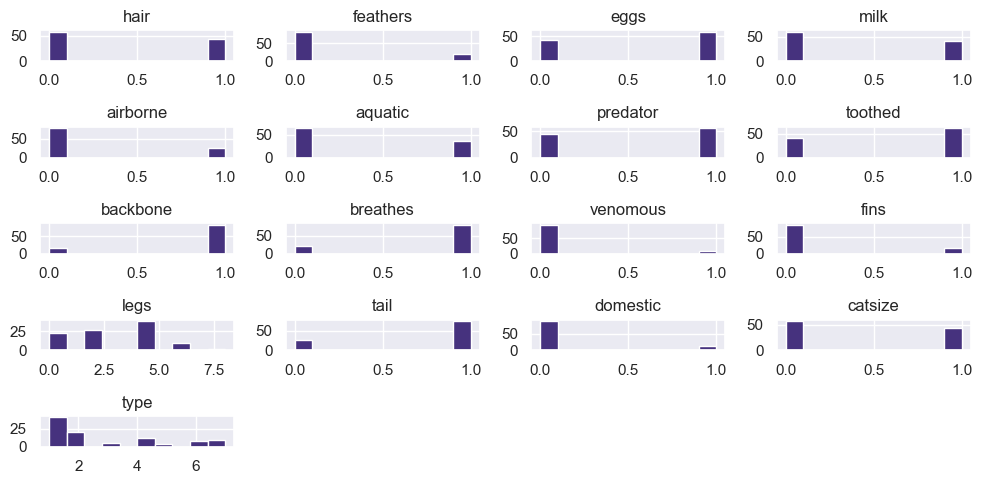

In [7]:
df.hist()
plt.tight_layout()

<AxesSubplot:>

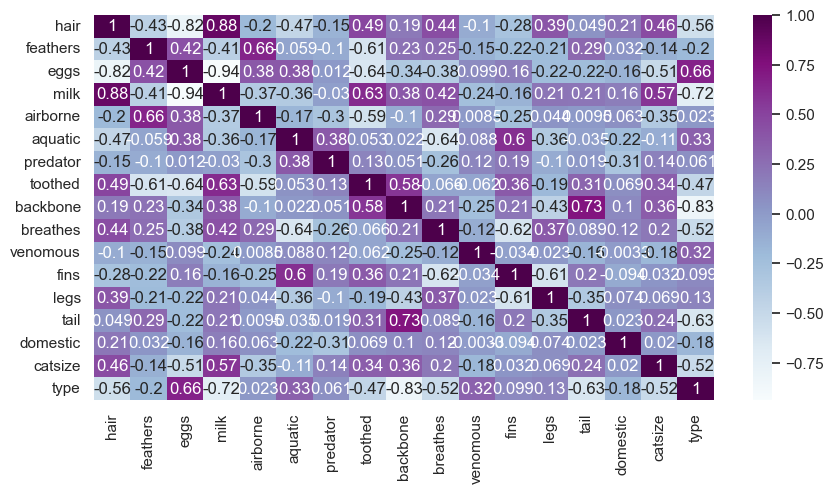

In [23]:
sns.heatmap(data=df.corr(), annot=True, cmap='BuPu')

<AxesSubplot:xlabel='type', ylabel='count'>

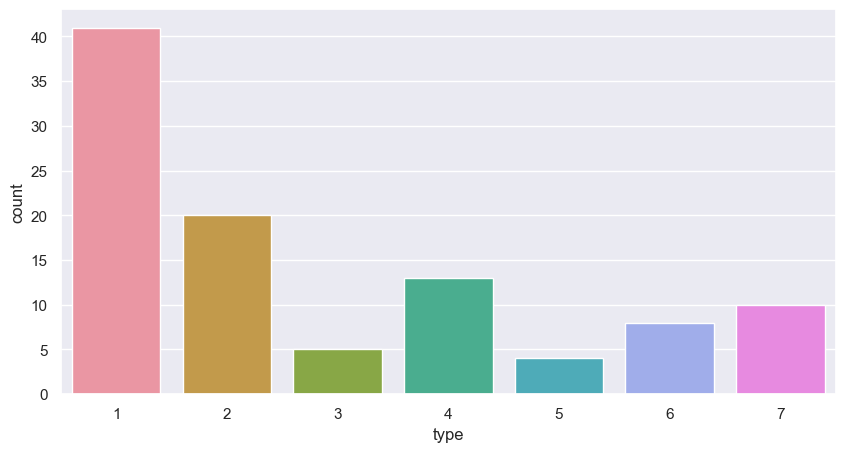

In [24]:
sns.countplot(x='type', data=df)

In [9]:
#standardizing the columns and splitting independent and dependent variables
from sklearn.preprocessing import StandardScaler
x = df.iloc[:,1:-1]
y = df['type']

In [11]:
#splitting data into training and testing records
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25, random_state=42)

#build the model

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
ypred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4, 5,
       5, 6, 1, 7], dtype=int64)

In [12]:
knn.score(xtrain,ytrain), knn.score(xtest,ytest)

(0.9866666666666667, 0.9615384615384616)

# Hyper parameter tuning

In [13]:
trainacc=[]
testacc=[]

#Loop for multiple k values
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    trainacc.append(knn.score(xtrain,ytrain))
    testacc.append(knn.score(xtest,ytest))

In [14]:
trainacc

[1.0,
 0.9866666666666667,
 0.9866666666666667,
 0.96,
 0.9333333333333333,
 0.8666666666666667,
 0.8666666666666667,
 0.8,
 0.8133333333333334]

In [15]:
testacc

[1.0,
 1.0,
 0.9615384615384616,
 0.9230769230769231,
 0.8846153846153846,
 0.7692307692307693,
 0.8076923076923077,
 0.7692307692307693,
 0.7692307692307693]

# Plotting the accuracies

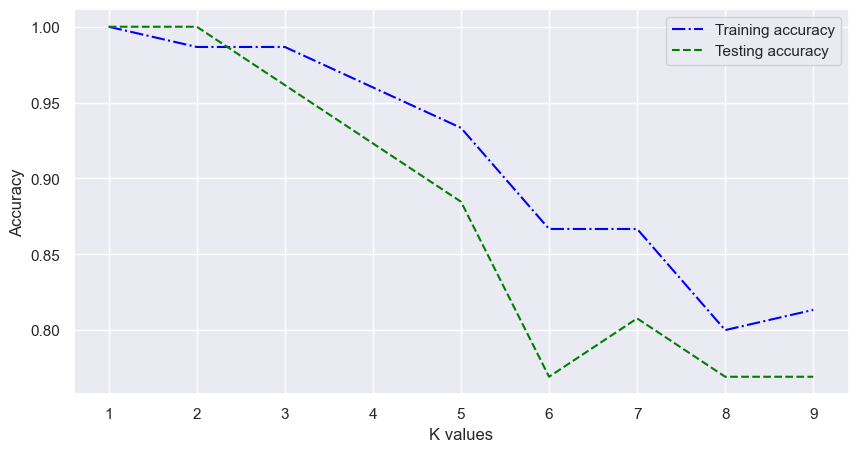

In [16]:
plt.plot(range(1,10), trainacc, linestyle = '-.', color='blue', label = 'Training accuracy')
plt.plot(range(1,10), testacc, linestyle='--', color='green', label='Testing accuracy')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.legend()

Above plot shows that the n_neighbors for this model is 2

In [17]:
#build the model

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
ypred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 3, 5,
       5, 6, 1, 7], dtype=int64)

In [18]:
from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



In [19]:
knn.score(xtrain,ytrain), knn.score(xtest,ytest)

(0.9866666666666667, 1.0)

The above model has very good accuracy

# Using K-Fold validation method

In [20]:
from sklearn.model_selection import KFold,cross_val_score
kf = KFold(n_splits=10)
kf_score = cross_val_score(KNeighborsClassifier(),x,y,cv=kf)

In [21]:
kf_score

array([1. , 0.7, 1. , 1. , 0.9, 1. , 0.8, 0.6, 0.9, 0.9])

In [22]:
kf_score.mean()

0.8800000000000001